In [1]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load CSV from URL
url = 'https://raw.githubusercontent.com/egorpol/beat_it/refs/heads/main/csv/dufour_onsets_librosa_unfiltered.csv'
df = pd.read_csv(url)

# Step 3: Display the first few rows of the DataFrame
display(df)


,onset_times
0,0.110295
1,0.400544
2,2.618050
3,4.858776
4,7.082086
...,...
91,67.401723
92,68.127347
93,68.673016
94,69.125805


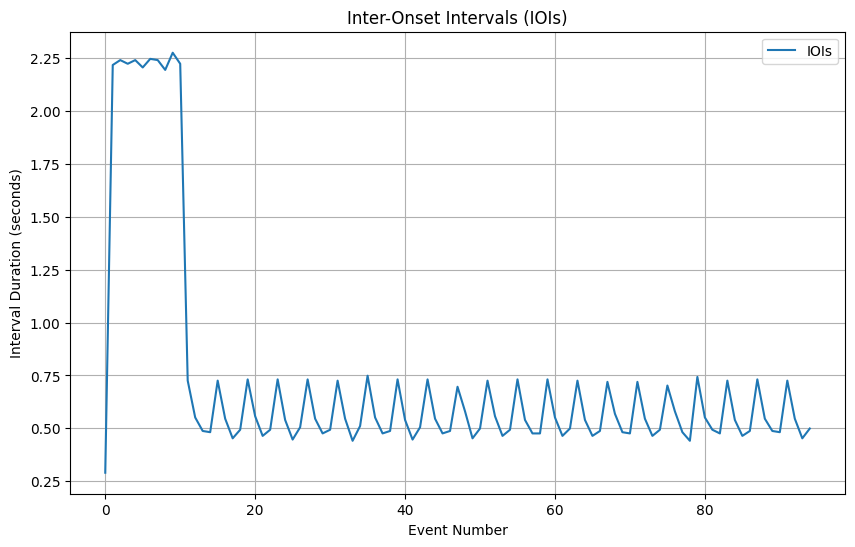

Mean IOI (Average Interval Duration): 0.7317340971476309
Standard Deviation of IOIs: 0.5239414581892734
Coefficient of Variation of IOIs: 0.7160271200039017


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Onset times in seconds
onset_times = df['onset_times'].values

# Calculate inter-onset intervals (IOIs)
iois = np.diff(onset_times)

# Plot the IOIs
plt.figure(figsize=(10, 6))
plt.plot(iois, label="IOIs")
plt.title('Inter-Onset Intervals (IOIs)')
plt.xlabel('Event Number')
plt.ylabel('Interval Duration (seconds)')
plt.grid(True)
plt.legend()
plt.show()

# Calculate standard deviation and coefficient of variation
mean_ioi = np.mean(iois)
std_ioi = np.std(iois)
cv_ioi = std_ioi / mean_ioi  # Coefficient of variation

# Print out results with descriptions
print("Mean IOI (Average Interval Duration):", mean_ioi)
print("Standard Deviation of IOIs:", std_ioi)
print("Coefficient of Variation of IOIs:", cv_ioi)


**Key Observations:**

- The average timing (**Mean IOI**) between events is around **0.73 seconds**, but the variability (**Standard Deviation** and **Coefficient of Variation**) indicates that these intervals are not stable. Some intervals are much shorter or longer than the average, as shown by the relatively high standard deviation and coefficient of variation.
  
- A **high CV (0.716)** suggests that there's a lot of relative inconsistency in the timing.

In [3]:
print(iois)

[0.29024943 2.21750567 2.24072562 2.22331066 2.24072562 2.20589569
 2.24653061 2.24072562 2.19428571 2.27555556 2.22331066 0.72562358
 0.55147392 0.48761905 0.48181406 0.72562358 0.54566893 0.45278912
 0.49342404 0.73142857 0.55727891 0.46439909 0.49342404 0.73142857
 0.53986395 0.44698413 0.50503401 0.73142857 0.54566893 0.47600907
 0.49342404 0.72562358 0.54566893 0.44117914 0.510839   0.74884354
 0.55147392 0.47600907 0.48761905 0.73142857 0.53986395 0.44698413
 0.50503401 0.73142857 0.54566893 0.47600907 0.48761905 0.69659864
 0.58049887 0.45278912 0.49922902 0.72562358 0.55727891 0.46439909
 0.49342404 0.73142857 0.53986395 0.47600907 0.47600907 0.73142857
 0.55147392 0.46439909 0.49922902 0.72562358 0.53986395 0.46439909
 0.48761905 0.71981859 0.56888889 0.48181406 0.47600907 0.71981859
 0.54566893 0.46439909 0.49342404 0.70240363 0.58049887 0.48181406
 0.44117914 0.74303855 0.55147392 0.49342404 0.47600907 0.72562358
 0.53986395 0.46439909 0.48761905 0.73142857 0.54566893 0.4876

Error (sum of squared residuals): 0.10915600756886477


,Original IOI,Multiplier,Reconstructed IOI,Residual
0,0.290249,1.0,0.247,0.043249
1,2.217506,9.0,2.223,-0.005494
2,2.240726,9.0,2.223,0.017726
3,2.223311,9.0,2.223,0.000311
4,2.240726,9.0,2.223,0.017726
...,...,...,...,...
90,0.481814,2.0,0.494,-0.012186
91,0.725624,3.0,0.741,-0.015376
92,0.545669,2.0,0.494,0.051669
93,0.452789,2.0,0.494,-0.041211


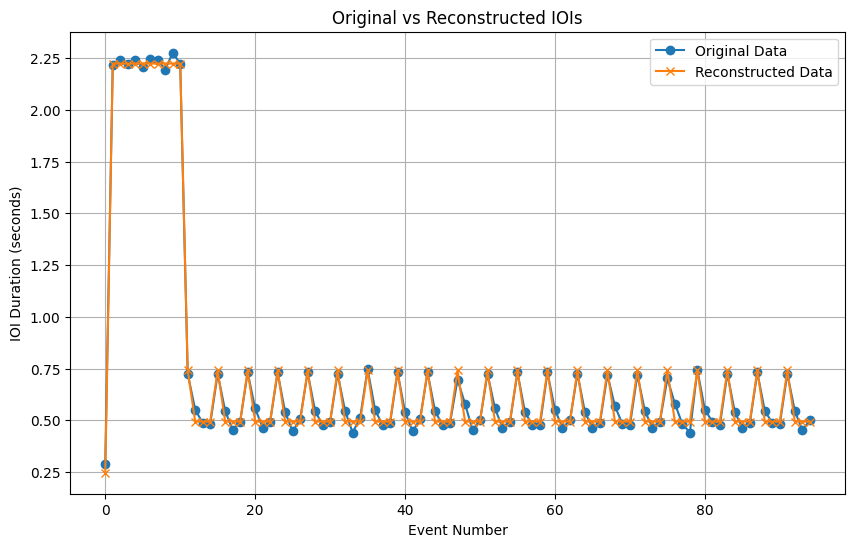

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace with actual data)
data = iois

# Custom base value (input your desired base value here)
base_value_custom = 0.247  # Adjust this value as needed

# Calculate multipliers and reconstructed data
multipliers = np.round(data / base_value_custom)
reconstructed_data = base_value_custom * multipliers

# Error calculation (Sum of squared residuals)
residuals = data - reconstructed_data
error = np.sum(residuals**2)

print(f"Error (sum of squared residuals): {error}")

# Create a DataFrame with Original IOI, Multiplier, Reconstructed IOI, Residual
df_results = pd.DataFrame({
    'Original IOI': data,
    'Multiplier': multipliers,
    'Reconstructed IOI': reconstructed_data,
    'Residual': residuals
})

# Display the DataFrame in Colab
display(df_results)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data', marker='o')
plt.plot(reconstructed_data, label='Reconstructed Data', marker='x')
plt.legend()
plt.title('Original vs Reconstructed IOIs')
plt.xlabel('Event Number')
plt.ylabel('IOI Duration (seconds)')
plt.grid(True)
plt.show()


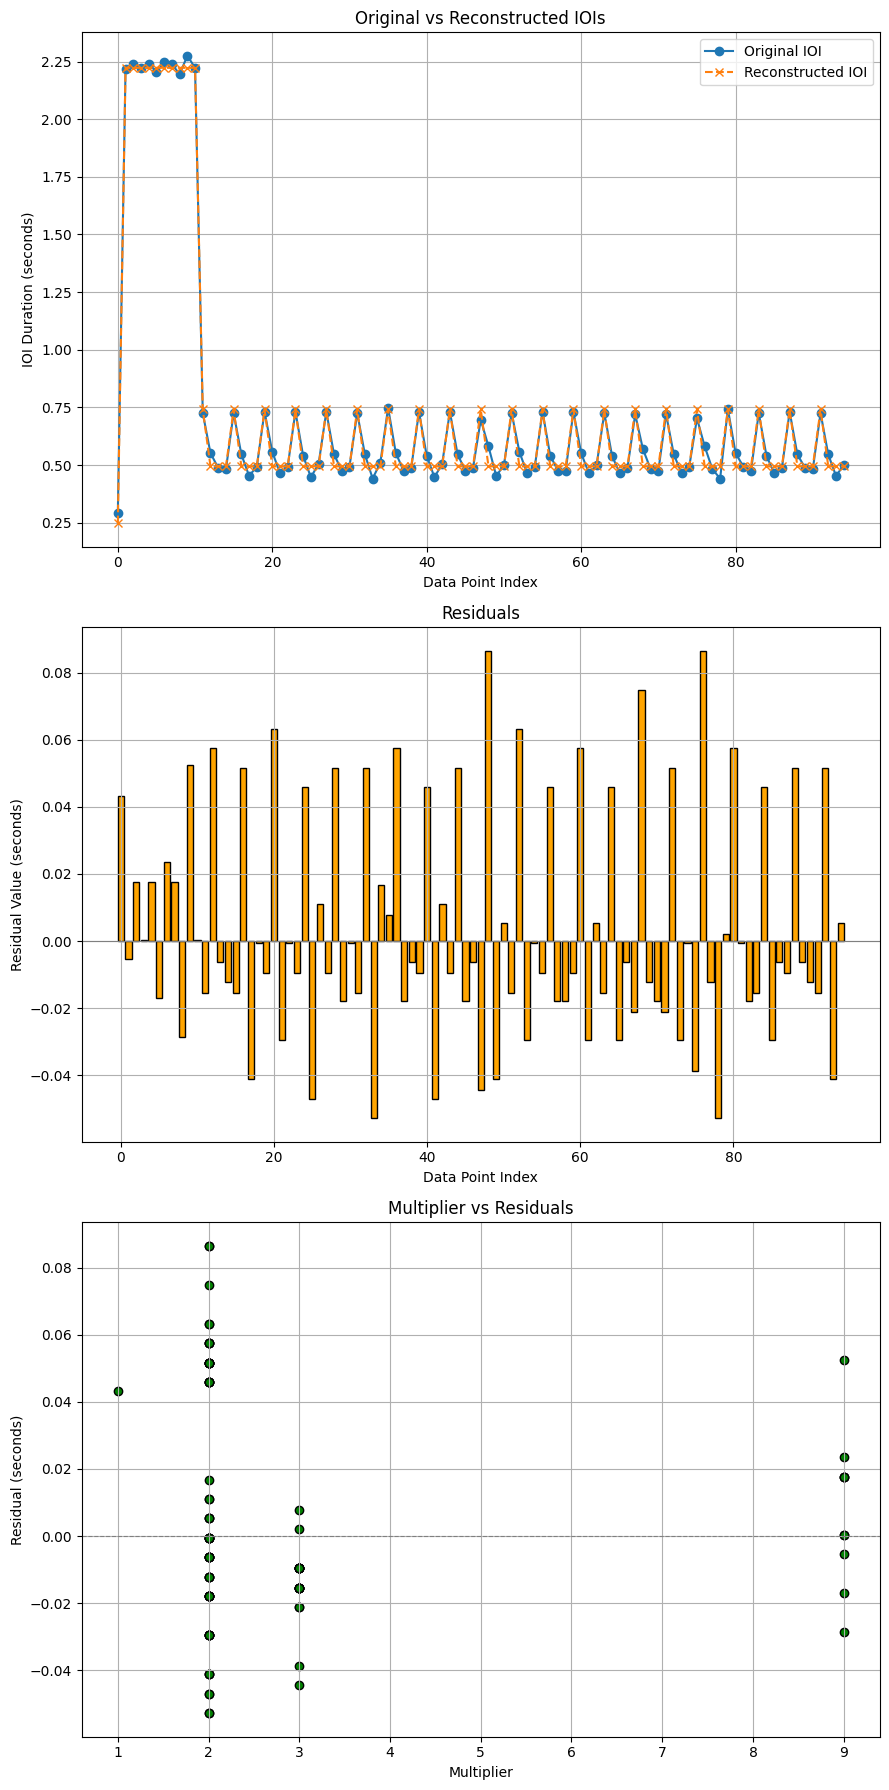

In [7]:
# Plotting Original vs Reconstructed IOIs and other subplots
plt.figure(figsize=(9, 18))  # Adjust figure size for vertical alignment

# Subplot 1: Original vs Reconstructed IOIs
plt.subplot(3, 1, 1)
plt.plot(data, label='Original IOI', marker='o', linestyle='-')
plt.plot(reconstructed_data, label='Reconstructed IOI', marker='x', linestyle='--')
plt.title('Original vs Reconstructed IOIs')
plt.xlabel('Data Point Index')
plt.ylabel('IOI Duration (seconds)')
plt.legend()
plt.grid(True)

# Subplot 2: Residuals
plt.subplot(3, 1, 2)
plt.bar(range(len(residuals)), residuals, color='orange', edgecolor='black')
plt.axhline(0, color='gray', linewidth=0.8)
plt.title('Residuals')
plt.xlabel('Data Point Index')
plt.ylabel('Residual Value (seconds)')
plt.grid(True)

# Subplot 3: Multiplier vs Residuals
plt.subplot(3, 1, 3)
plt.scatter(df_results['Multiplier'], df_results['Residual'], color='green', edgecolor='black')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Adding a line at y=0 for reference
plt.title('Multiplier vs Residuals')
plt.xlabel('Multiplier')
plt.ylabel('Residual (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

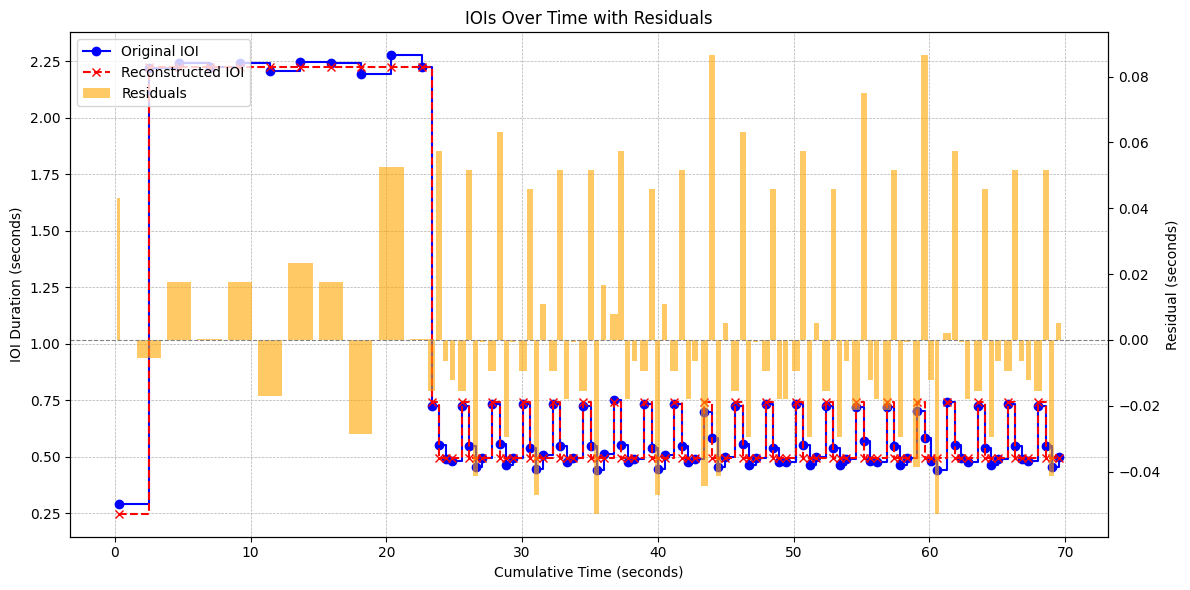

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the cumulative time axis
df_results['Cumulative Time'] = df_results['Original IOI'].cumsum()

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Original IOIs as a step plot
ax1.step(df_results['Cumulative Time'], df_results['Original IOI'], where='post',
         label='Original IOI', color='blue', marker='o')

# Plot Reconstructed IOIs as a step plot
ax1.step(df_results['Cumulative Time'], df_results['Reconstructed IOI'], where='post',
         label='Reconstructed IOI', color='red', linestyle='--', marker='x')

# Set labels and title for the primary y-axis
ax1.set_xlabel('Cumulative Time (seconds)')
ax1.set_ylabel('IOI Duration (seconds)')
ax1.set_title('IOIs Over Time with Residuals')

# Enable grid on primary y-axis
ax1.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Create a secondary y-axis for residuals
ax2 = ax1.twinx()

# Plot Residuals as a bar chart
ax2.bar(df_results['Cumulative Time'], df_results['Residual'],
        width=df_results['Original IOI'] * 0.8,  # Adjust bar width as needed
        color='orange', alpha=0.6, label='Residuals')

# Set label for the secondary y-axis
ax2.set_ylabel('Residual (seconds)')

# Add a horizontal line at y=0 for reference
ax2.axhline(0, color='gray', linewidth=0.8, linestyle='--')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Adjust layout for better spacing
fig.tight_layout()

# Display the plot
plt.show()


In [10]:
display(df_results)

,Original IOI,Multiplier,Reconstructed IOI,Residual,Cumulative Time
0,0.290249,1.0,0.247,0.043249,0.290249
1,2.217506,9.0,2.223,-0.005494,2.507755
2,2.240726,9.0,2.223,0.017726,4.748481
3,2.223311,9.0,2.223,0.000311,6.971791
4,2.240726,9.0,2.223,0.017726,9.212517
...,...,...,...,...,...
90,0.481814,2.0,0.494,-0.012186,67.291429
91,0.725624,3.0,0.741,-0.015376,68.017052
92,0.545669,2.0,0.494,0.051669,68.562721
93,0.452789,2.0,0.494,-0.041211,69.015510


In [11]:
# Import Libraries
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, Span
from bokeh.io import push_notebook

# Initialize Bokeh output
output_notebook()


# Prepare the data source
source = ColumnDataSource(df_results)

# Initialize the Bokeh figure with 'width' and 'height'
p = figure(title="IOI Residuals Over Time",
           x_axis_label='Cumulative Time (seconds)',
           y_axis_label='Residual (seconds)',
           width=900,  # Use 'width' instead of 'plot_width'
           height=400,  # Use 'height' instead of 'plot_height'
           tools="pan,wheel_zoom,box_zoom,reset,save")

# Add Residuals as circles
residuals = p.circle('Cumulative Time', 'Residual', size=10, color='orange', alpha=0.6, source=source, legend_label="Residuals")

# Add Cues as vertical dashed lines
for time in df_results['Cumulative Time']:
    span = Span(location=time, dimension='height', line_color='gray', line_dash='dashed', line_width=1)
    p.add_layout(span)

# Add HoverTool for Residuals
hover = HoverTool(tooltips=[
    ("Index", "@index"),
    ("Cumulative Time", "@{Cumulative Time}{0.000} s"),
    ("Residual", "@Residual{0.000} s"),
    ("Original IOI", "@{Original IOI}{0.000} s"),
    ("Reconstructed IOI", "@{Reconstructed IOI}{0.000} s"),
    ("Multiplier", "@Multiplier")
], renderers=[residuals])

p.add_tools(hover)

# Add horizontal line at y=0
zero_span = Span(location=0, dimension='width', line_color='black', line_dash='solid', line_width=2)
p.add_layout(zero_span)

# Customize the legend
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Show the plot
show(p)


Loading BokehJS ...

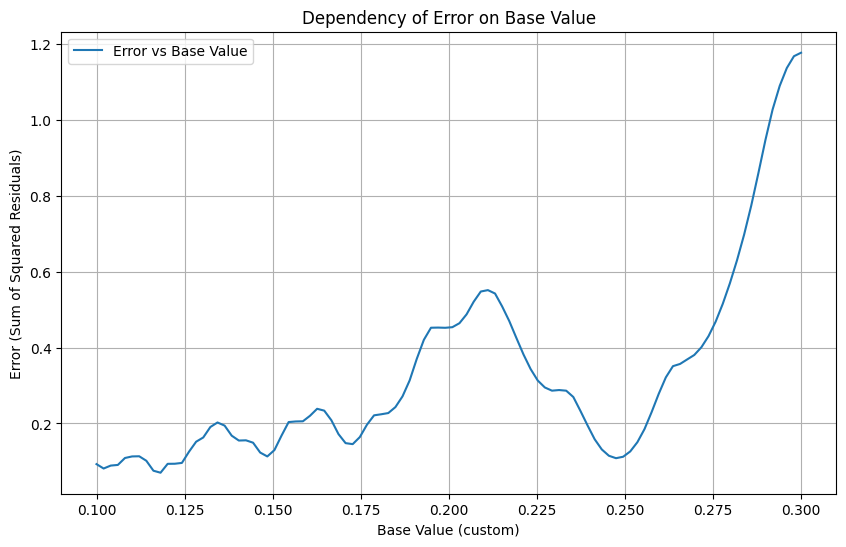

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data = iois

# Define a range of base values to explore
base_values = np.linspace(0.1, 0.3, 100)  # You can adjust this range depending on the data

# Initialize an empty list to store the errors
errors = []

# Loop through different base values and compute the error for each
for base_value_custom in base_values:
    # Calculate multipliers and reconstructed data
    multipliers = np.round(data / base_value_custom)
    reconstructed_data = base_value_custom * multipliers

    # Calculate the residuals and error (sum of squared residuals)
    residuals = data - reconstructed_data
    error = np.sum(residuals**2)

    # Append the error to the list
    errors.append(error)

# Plotting the dependency of the error on the base_value_custom
plt.figure(figsize=(10, 6))
plt.plot(base_values, errors, label='Error vs Base Value')
plt.title('Dependency of Error on Base Value')
plt.xlabel('Base Value (custom)')
plt.ylabel('Error (Sum of Squared Residuals)')
plt.grid(True)
plt.legend()
plt.show()


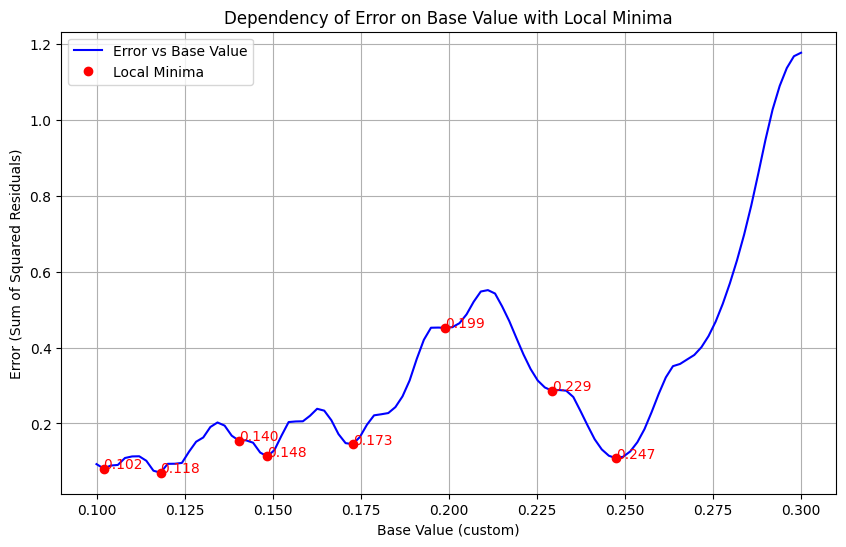

Local minima (base values) and corresponding errors:
Base Value: 0.10202, Error: 0.08139
Base Value: 0.11818, Error: 0.07031
Base Value: 0.14040, Error: 0.15507
Base Value: 0.14848, Error: 0.11319
Base Value: 0.17273, Error: 0.14560
Base Value: 0.19899, Error: 0.45200
Base Value: 0.22929, Error: 0.28640
Base Value: 0.24747, Error: 0.10857


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Example data (replace with actual data)
data = iois

# Define a range of base values to explore
base_values = np.linspace(0.1, 0.3, 100)  # Adjust range if needed

# Initialize an empty list to store the errors
errors = []

# Loop through different base values and compute the error for each
for base_value_custom in base_values:
    # Calculate multipliers and reconstructed data
    multipliers = np.round(data / base_value_custom)
    reconstructed_data = base_value_custom * multipliers

    # Calculate the residuals and error (sum of squared residuals)
    residuals = data - reconstructed_data
    error = np.sum(residuals**2)

    # Append the error to the list
    errors.append(error)

# Convert errors to a numpy array for further processing
errors = np.array(errors)

# Find local minima (by finding peaks of the negative error array)
minima_indices, _ = find_peaks(-errors)

# Plotting the dependency of the error on the base_value_custom
plt.figure(figsize=(10, 6))
plt.plot(base_values, errors, label='Error vs Base Value', color='blue')

# Mark the local minima
plt.plot(base_values[minima_indices], errors[minima_indices], 'ro', label='Local Minima')

# Annotate the local minima on the plot
for idx in minima_indices:
    plt.text(base_values[idx], errors[idx], f'{base_values[idx]:.3f}', color='red')

plt.title('Dependency of Error on Base Value with Local Minima')
plt.xlabel('Base Value (custom)')
plt.ylabel('Error (Sum of Squared Residuals)')
plt.grid(True)
plt.legend()
plt.show()

# Print out the local minima values
print("Local minima (base values) and corresponding errors:")
for idx in minima_indices:
    print(f"Base Value: {base_values[idx]:.5f}, Error: {errors[idx]:.5f}")


Best base value: 0.117417
Minimum error (sum of squared residuals): 0.067876

Detailed Fit Results:


,Original IOI,Multiplier,Reconstructed IOI,Residual
0,0.290249,2,0.234835,0.055415
1,2.217506,19,2.230931,-0.013425
2,2.240726,19,2.230931,0.009795
3,2.223311,19,2.230931,-0.007620
4,2.240726,19,2.230931,0.009795
...,...,...,...,...
90,0.481814,4,0.469670,0.012144
91,0.725624,6,0.704505,0.021119
92,0.545669,5,0.587087,-0.041418
93,0.452789,4,0.469670,-0.016881


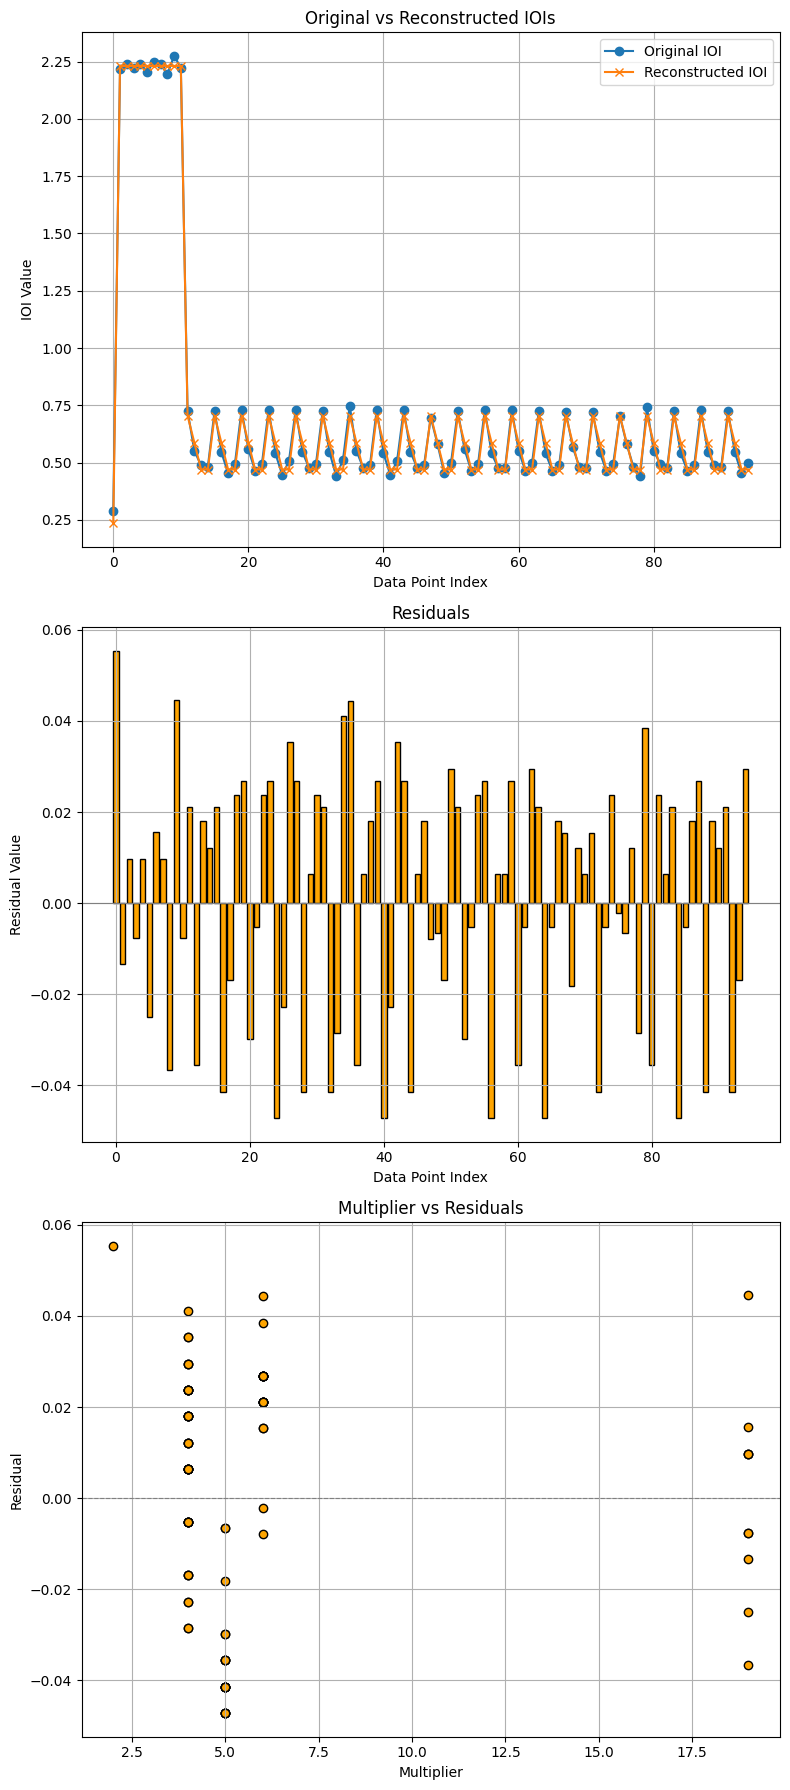

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Replace the following line with your actual 'iois' data
data = iois

# Define the range for the base value
base_value_range = np.linspace(0.1, 0.3, 1000)
best_base_value = 0.23
min_error = float('inf')

# Grid search for best base value
for base_value in base_value_range:
    multipliers = np.round(data / base_value)
    reconstructed_data = base_value * multipliers
    residuals = data - reconstructed_data
    error = np.sum(residuals**2)

    if error < min_error:
        min_error = error
        best_base_value = base_value

print(f"Best base value: {best_base_value:.6f}")
print(f"Minimum error (sum of squared residuals): {min_error:.6f}")

# Calculate multipliers and reconstructed data using the best base value
multipliers = np.round(data / best_base_value)
reconstructed_data = best_base_value * multipliers
residuals = data - reconstructed_data

# Create a DataFrame to display the results
df = pd.DataFrame({
    'Original IOI': data,
    'Multiplier': multipliers.astype(int),
    'Reconstructed IOI': reconstructed_data,
    'Residual': residuals
})

# Display the DataFrame
print("\nDetailed Fit Results:")
display(df)

# Plotting Original vs Reconstructed IOIs and other subplots
plt.figure(figsize=(8, 18))  # Adjust figure size for vertical alignment

# Subplot 1: Original vs Reconstructed IOIs
plt.subplot(3, 1, 1)
plt.plot(data, label='Original IOI', marker='o')
plt.plot(reconstructed_data, label='Reconstructed IOI', marker='x')
plt.title('Original vs Reconstructed IOIs')
plt.xlabel('Data Point Index')
plt.ylabel('IOI Value')
plt.legend()
plt.grid(True)

# Subplot 2: Residuals
plt.subplot(3, 1, 2)
plt.bar(range(len(residuals)), residuals, color='orange', edgecolor='black')
plt.axhline(0, color='gray', linewidth=0.8)
plt.title('Residuals')
plt.xlabel('Data Point Index')
plt.ylabel('Residual Value')
plt.grid(True)

# Subplot 3: Multiplier vs Residuals
plt.subplot(3, 1, 3)
plt.scatter(df['Multiplier'], df['Residual'], color='orange', edgecolor='black')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Adding a line at y=0 for reference
plt.title('Multiplier vs Residuals')
plt.xlabel('Multiplier')
plt.ylabel('Residual')
plt.grid(True)

plt.tight_layout()
plt.show()